In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('data_for_modelcr1.csv')

In [3]:
df.head()

,customer_class,log_price,no_of_items_in_cat,order_cat,order_num
0,high_value,5.687992,7,"Organic Fruits &amp; Vegetables,Organic Vegeta...",20461
1,low_value,6.045005,3,"Cold Pressed Oils,Cold Pressed Oils",20442
2,one_time_cust,5.112710,4,"Fruits &amp; Vegetables,Vegetables",20417
3,one_time_cust,5.112710,1,"Fruits &amp; Vegetables,Vegetables,Essential V...",20417
4,one_time_cust,3.676301,1,"Fruits &amp; Vegetables,Vegetables",20403


# Reducing Category to Higher level category

In [4]:
cat_main = []
for ev_man in df['order_cat']:
    #print(ev_man)
    cat_item = str(ev_man).split(',')[0].replace('&amp;','&')
    cat_main.append(cat_item)
df['cat_main'] = cat_main

In [5]:
df.head()

,customer_class,log_price,no_of_items_in_cat,order_cat,order_num,cat_main
0,high_value,5.687992,7,"Organic Fruits &amp; Vegetables,Organic Vegeta...",20461,Organic Fruits & Vegetables
1,low_value,6.045005,3,"Cold Pressed Oils,Cold Pressed Oils",20442,Cold Pressed Oils
2,one_time_cust,5.112710,4,"Fruits &amp; Vegetables,Vegetables",20417,Fruits & Vegetables
3,one_time_cust,5.112710,1,"Fruits &amp; Vegetables,Vegetables,Essential V...",20417,Fruits & Vegetables
4,one_time_cust,3.676301,1,"Fruits &amp; Vegetables,Vegetables",20403,Fruits & Vegetables


# vectorizing the categories <-- This will be our X

In [6]:
new_df = pd.get_dummies(df['cat_main'])
new_df['log_price'] = df['log_price']
new_df['no_of_items_in_cat'] = df['no_of_items_in_cat']

In [7]:
new_df.head()

,Atta & Rice Varieties,Cold Pressed Oils,Dairy Products,Fruits & Vegetables,Grocery,Home Care,Monthly Shopping List,Organic Fruits & Vegetables,Organic Products,Personal Care - Head to Toe,Ready to Cook,Staples - Dal,nan,log_price,no_of_items_in_cat
0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.687992,7
1,0,1,0,0,0,0,0,0,0,0,0,0,0,6.045005,3
2,0,0,0,1,0,0,0,0,0,0,0,0,0,5.112710,4
3,0,0,0,1,0,0,0,0,0,0,0,0,0,5.112710,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,3.676301,1


# defining X & Y for prediction

In [8]:
X = new_df
Y = df['customer_class']

# dividing data for training & test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Training the NB Classifier

In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

# Testing the model

In [17]:
#Sample Testing
for i,ev_row in df[:5].iterrows():
    print(ev_row['cat_main'])
    print(ev_row['no_of_items_in_cat'])
    print(ev_row['log_price'])
y1 = clf.predict(X[:5])
print(y1)

Organic Fruits & Vegetables
7
5.687991789
Cold Pressed Oils
3
6.045005314
Fruits & Vegetables
4
5.112710419
Fruits & Vegetables
1
5.112710419
Fruits & Vegetables
1
3.676300672
['high_value' 'one_time_cust' 'one_time_cust' 'one_time_cust'
 'one_time_cust']


# Scoring the model

In [18]:
y_pred_class = clf.predict(X_test)

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.8080229226361032

# Checking confusion matrix

In [20]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 12   0   0   6]
 [  3   1   0  35]
 [  0   0   0   3]
 [ 15   5   0 269]]


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
shuffle_split = ShuffleSplit(n_splits=5)
score = cross_val_score(nb, X_train, y_train, cv=shuffle_split)
score

array([0.75238095, 0.82857143, 0.81904762, 0.80952381, 0.80952381])

In [22]:
score.mean()

0.8038095238095238

# Testing with few other classifiers as well to check accuracy

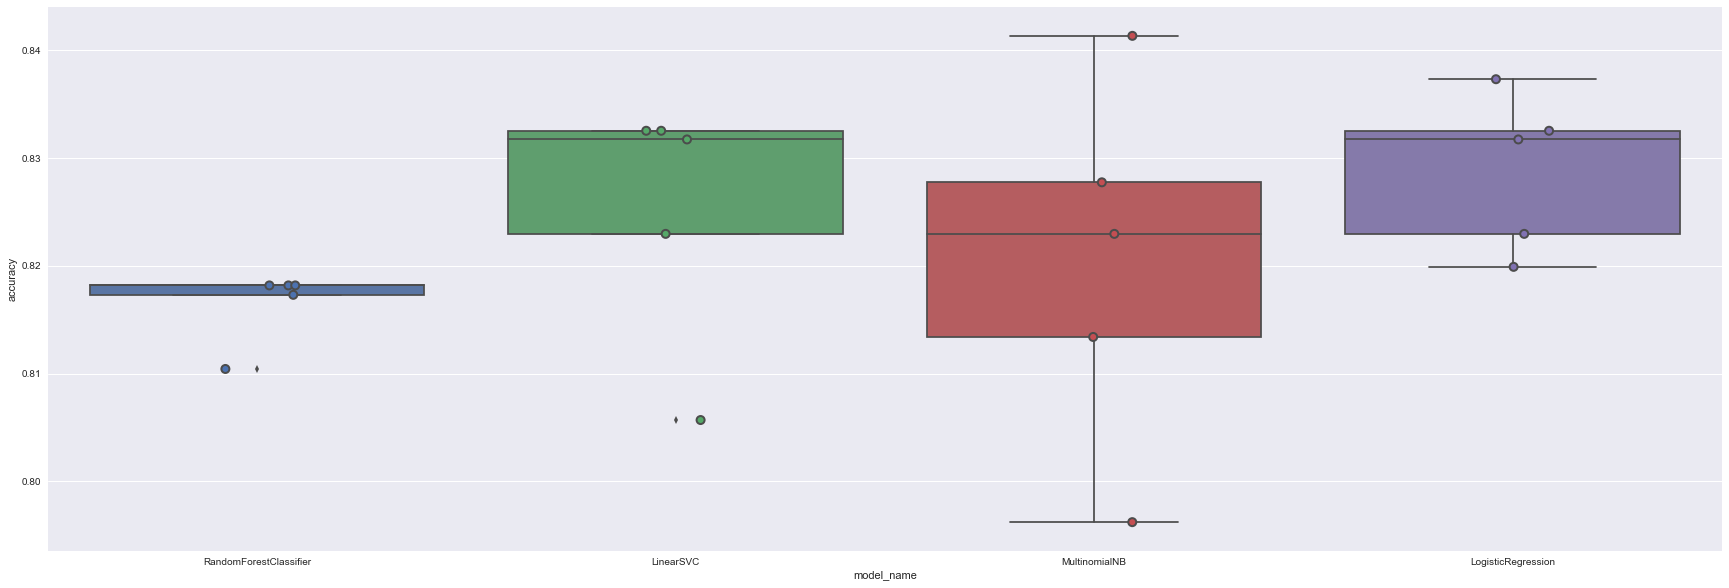

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()